# Portfolio and Risk Analysis

---



Candidato: Cleiton José Carneiro Junior

## Parte 1: Risco de Mercado

Considerando o espaço amostral das seguintes 20 ações abaixo para investir:

 * **Ações** = [BBDC4, SBSP3, ELET3, B3SA3, SUZB3, EQTL3, RENT3, RDOR3, RADL3,
BRFS3, RAIL3, VBBR3, ENEV3, CPLE6, CCRO3, EGIE3, CSNA3, HYPE3, CPFE3, BEEF3].

As empresas aqui listadas são de setores diversos (financeiro, saneamento, infraestrutura, saúde, papel e celulose, alimentos, siderurgia, locação de carros).


**1.      Cálculo da volatilidade para o período de 12 meses de cada uma das ações.**


A volatilidade anual de cada ação foi estimada com base nos preços de **fechamento ajustados diários**, obtidos via Yahoo Finance, no período de **31/12/2023 a 31/12/2024**.

As etapas do cálculo foram:


1. **Retornos Logarítmicos Diários**

Os retornos foram calculados conforme a fórmula:

$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

- Onde:  
  - $P_t$: preço ajustado no dia $t$  
  - $P_{t-1}$: preço ajustado no dia anterior  

> *Assume-se que os retornos seguem uma distribuição aproximadamente normal.*


2. **Volatilidade Diária (Desvio Padrão Amostral)**

A volatilidade diária corresponde ao desvio padrão dos retornos:

$$
\sigma_{\text{diária}} = \sqrt{\frac{1}{N - 1} \sum_{i=1}^{N} (r_i - \bar{r})^2}
$$

- Onde:
  - $N$: número de dias úteis disponíveis
  - $\bar{r}$: média dos retornos diários

> *Utiliza-se $N-1$ (correção de Bessel) para evitar viés na estimativa amostral.*


3. **Anualização da Volatilidade**

A volatilidade anualizada foi obtida pela fórmula:

$$
\sigma_{\text{anual}} = \sigma_{\text{diária}} \times \sqrt{252}
$$

- Assumindo:
  - 252 dias úteis por ano (convenção do mercado financeiro)
  - Independência dos retornos diários (hipótese de *random walk*)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Lista de tickers das ações
tickers = [
    "BBDC4.SA", "SBSP3.SA", "ELET3.SA", "B3SA3.SA", "SUZB3.SA",
    "EQTL3.SA", "RENT3.SA", "RDOR3.SA", "RADL3.SA", "BRFS3.SA",
    "RAIL3.SA", "VBBR3.SA", "ENEV3.SA", "CPLE6.SA", "CCRO3.SA",
    "EGIE3.SA", "CSNA3.SA", "HYPE3.SA", "CPFE3.SA", "BEEF3.SA"
]

# Período de análise: 31/12/2023 a 31/12/2024
# Lembrete: YahooFinance Timestamp tem o formato 'YYYY-MM-DD'
start_date = "2023-12-31"
end_date = "2024-12-31"

# Dicionário para armazenar a volatilidade de cada ação
volatilities = {}

for ticker in tickers:
    try:
        # Baixar dados históricos
        # 'auto_adjust=True' ajusta automaticamente para splits e dividendos, retornando o 'Adj Close' no DataFrame
        data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)

        # Verificar se há dados suficientes
        if data.empty:
            print(f"Aviso: Não foi possível baixar dados para {ticker}. Pulando.")
            volatilities[ticker] = np.nan
            continue

        # Calcular os retornos diários (retornos logarítmicos)
        data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))

        # Remover a primeira linha que terá NaN devido ao shift
        returns = data['Returns'].dropna()

        # Verificar se há retornos para calcular
        if returns.empty:
            print(f"Aviso: Não há retornos calculáveis para {ticker}. Pulando.")
            volatilities[ticker] = np.nan
            continue

        # Calcular o desvio padrão diário
        daily_std = returns.std()

        # Anualizar a volatilidade: Assumindo 252 dias úteis de negociação no ano
        annual_volatility = daily_std * np.sqrt(252)

        # Armazenar a volatilidade (em porcentagem)
        volatilities[ticker] = annual_volatility * 100

        print(f"Volatilidade de {ticker}: {volatilities[ticker]:.2f}%")

    except Exception as e:
        print(f"Erro ao processar {ticker}: {e}")
        volatilities[ticker] = np.nan

print("\n--- Resultados Finais ---")
results_df = pd.DataFrame(volatilities.items(), columns=['Ação', 'Volatilidade Anual (%)'])
results_df = results_df.sort_values(by='Volatilidade Anual (%)', ascending=False)

# A linha original causava um erro porque .to_frame() é para Séries, e não DataFrames.
# A abordagem corrigida mantém os dados como números e usa o Styler para a formatação.
# A função display() renderiza a tabela estilizada no Colab.
display(results_df.style.format({'Volatilidade Anual (%)': '{:.2f}%'}, na_rep="Dados Indisponíveis"))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Volatilidade de BBDC4.SA: 28.04%
Volatilidade de SBSP3.SA: 23.19%


[*********************100%***********************]  1 of 1 completed


Volatilidade de ELET3.SA: 23.91%


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Volatilidade de B3SA3.SA: 27.77%
Volatilidade de SUZB3.SA: 28.09%



[*********************100%***********************]  1 of 1 completed


Volatilidade de EQTL3.SA: 28.19%


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Volatilidade de RENT3.SA: 40.99%
Volatilidade de RDOR3.SA: 30.23%


[*********************100%***********************]  1 of 1 completed


Volatilidade de RADL3.SA: 25.58%


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Volatilidade de BRFS3.SA: 39.10%
Volatilidade de RAIL3.SA: 25.73%


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Volatilidade de VBBR3.SA: 26.71%
Volatilidade de ENEV3.SA: 23.38%


[*********************100%***********************]  1 of 1 completed


Volatilidade de CPLE6.SA: 20.57%


ERROR:yfinance:HTTP Error 404: 
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCRO3.SA']: YFTzMissingError('possibly delisted; no timezone found')


Aviso: Não foi possível baixar dados para CCRO3.SA. Pulando.


[*********************100%***********************]  1 of 1 completed


Volatilidade de EGIE3.SA: 18.23%


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Volatilidade de CSNA3.SA: 38.29%
Volatilidade de HYPE3.SA: 34.39%


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Volatilidade de CPFE3.SA: 19.22%
Volatilidade de BEEF3.SA: 37.81%

--- Resultados Finais ---


,Ação,Volatilidade Anual (%)
6,RENT3.SA,40.99%
9,BRFS3.SA,39.10%
16,CSNA3.SA,38.29%
19,BEEF3.SA,37.81%
17,HYPE3.SA,34.39%
7,RDOR3.SA,30.23%
5,EQTL3.SA,28.19%
4,SUZB3.SA,28.09%
0,BBDC4.SA,28.04%
3,B3SA3.SA,27.77%


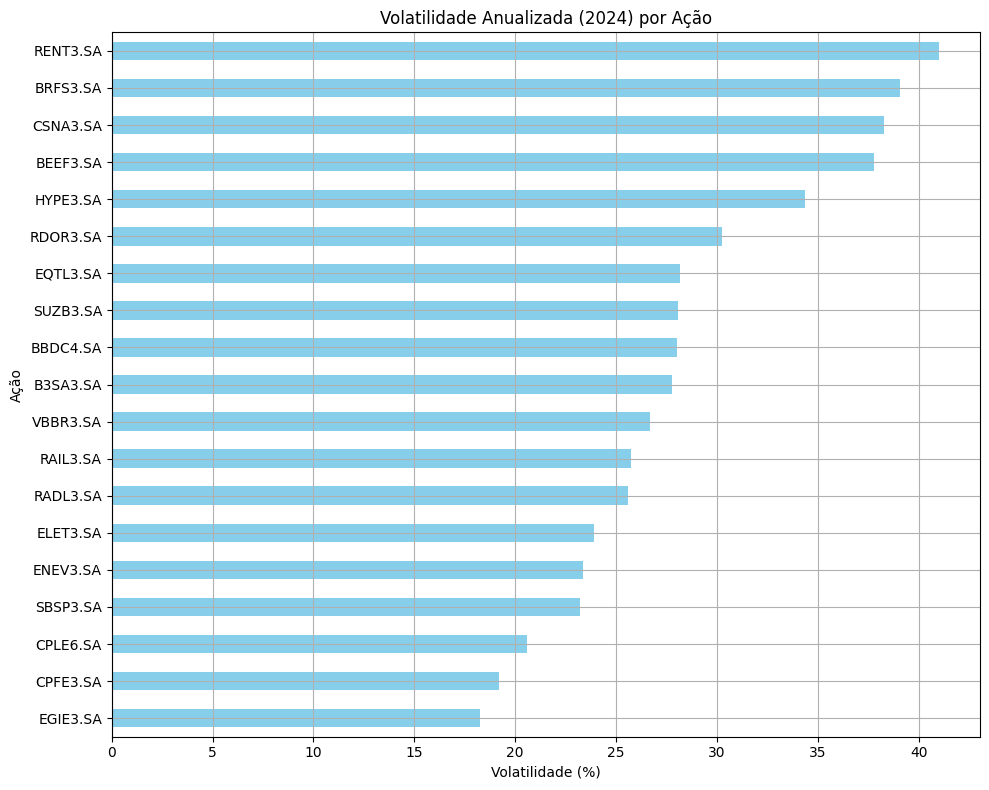

In [ ]:
import matplotlib.pyplot as plt

results_df.dropna().set_index('Ação')['Volatilidade Anual (%)'].sort_values().plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title("Volatilidade Anualizada (2024) por Ação")
plt.xlabel("Volatilidade (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observação sobre CCRO3/MOTV3**: As ações da CCR passaram a ser negociadas como MOTV3 na B3 a partir de maio de 2025 devido à mudança de marca para Motiva Infraestrutura de Mobilidade ([Fonte: Estadão E-investidor](https://einvestidor.estadao.com.br/ultimas/ccr-ccro3-novo-nome-ticker-b3/)). Como o Yahoo Finance não integrou os dados históricos entre os tickers, tornando a série temporal incompleta, a ação foi excluída desta análise.

**2. Calcule a volatilidade de um portfólio distribuído igualmente, com 5% em cada uma das ações apresentadas.**

Em sua Teoria Moderna do Portfólio, Markowitz (1952) destacou a importância do comportamento conjunto dos ativos em um portfólio. O conceito central, conhecido como *Mean-Variance Portfolio*, evidencia que a diversificação permite maximizar o retorno esperado dado um nível de risco, ou minimizar o risco dado um nível de retorno.

O risco esperado do portfólio, expresso pela variância dos retornos, é calculado pela seguinte equação:

$$
\sigma_p^2 = \sum_{i=1}^{N} w_i^2 \sigma_i^2 + \sum_{i=1}^{N} \sum_{\substack{j=1 \\ j \ne i}}^{N} w_i w_j \sigma_{ij}
$$

Onde:

- $ \sigma_p^2 $: variância do portfólio  
- $ w_i $: peso do ativo $( i $) no portfólio  
- $ \sigma_i^2 $: variância do ativo $( i $)  
- $ \sigma_{ij} $: covariância entre os ativos $( i $) e $( j $)  
- $ N $: número de ativos no portfólio

A **volatilidade do portfólio** é obtida como a raiz quadrada da variância: $\sigma_p = \sqrt{\sigma_p^2} $

Na sua forma matricial, temos:

$$
\sigma_p^2 = \mathbf{w}^\top \cdot \Sigma \cdot \mathbf{w}
$$

Onde:
- $\mathbf{w}$: vetor coluna de pesos do portfólio  
- $\Sigma$: matriz de covariância dos ativos  
- $\mathbf{w}^\top$: transposta do vetor de pesos  

Observação: como pontuado anteriormente, a série histórica do ticker `CCRO3` não está disponível, devido a uma alteração no código da empresa. Dessa forma, os pesos foram igualmente redistribuídos entre as 19 ações plenamente analisadas.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Lista de tickers das ações
tickers = [
    "BBDC4.SA", "SBSP3.SA", "ELET3.SA", "B3SA3.SA", "SUZB3.SA",
    "EQTL3.SA", "RENT3.SA", "RDOR3.SA", "RADL3.SA", "BRFS3.SA",
    "RAIL3.SA", "VBBR3.SA", "ENEV3.SA", "CPLE6.SA", "CCRO3.SA",
    "EGIE3.SA", "CSNA3.SA", "HYPE3.SA", "CPFE3.SA", "BEEF3.SA"
]

# Período de análise
start_date = "2023-12-31"
end_date = "2024-12-31"

# Baixar todos os dados de uma vez
all_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']

# Remover ações com dados faltantes
valid_tickers = all_data.columns[~all_data.isnull().all()]
all_data = all_data[valid_tickers]

if len(valid_tickers) == 0:
    print("Erro: Nenhum dado válido encontrado para cálculo do portfólio.")
else:
    print(f"\nAções válidas para cálculo do portfólio ({len(valid_tickers)}):")
    print(list(valid_tickers))

    # Calcular retornos logarítmicos
    returns = np.log(all_data / all_data.shift(1)).dropna()

    # Definir pesos iguais (ajustado para número de ações válidas)
    weights = np.array([1/len(valid_tickers)] * len(valid_tickers))

    # Calcular matriz de covariância anualizada
    cov_matrix_annual = returns.cov() * 252

    # Calcular variância e volatilidade do portfólio
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
    portfolio_volatility = np.sqrt(portfolio_variance) * 100

    print(f"\n--- Resultado do Portfólio ---")
    print(f"\n✓ Volatilidade Anual do Portfólio (pesos iguais): {portfolio_volatility:.2f}%")
    print(f"↪ {len(valid_tickers)} ações válidas com {weights[0]*100:.3f}% alocado em cada")

[**********************80%*************          ]  16 of 20 completedERROR:yfinance:HTTP Error 404: 
[*********************100%***********************]  20 of 20 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCRO3.SA']: YFTzMissingError('possibly delisted; no timezone found')



Ações válidas para cálculo do portfólio (19):
['B3SA3.SA', 'BBDC4.SA', 'BEEF3.SA', 'BRFS3.SA', 'CPFE3.SA', 'CPLE6.SA', 'CSNA3.SA', 'EGIE3.SA', 'ELET3.SA', 'ENEV3.SA', 'EQTL3.SA', 'HYPE3.SA', 'RADL3.SA', 'RAIL3.SA', 'RDOR3.SA', 'RENT3.SA', 'SBSP3.SA', 'SUZB3.SA', 'VBBR3.SA']

--- Resultado do Portfólio ---

✓ Volatilidade Anual do Portfólio (pesos iguais): 15.98%
↪ 19 ações válidas com 5.263% alocado em cada


**3. Calcule a alocação ideal em cada uma das ações para construir um portfólio com a menor volatilidade possível, onde cada ação pode ter no mínimo 0% de alocação e no máximo 10% de alocação. Além disso, qual o valor dessa volatilidade mínima?**

A otimização de portfólio busca determinar a alocação ótima de ativos que minimize o risco total (volatilidade) do portfólio, respeitando restrições pré-definidas, como limites mínimos e máximos por ativo, bem como a soma total das alocações. Conforme demonstrado por Markowitz (1952), o risco de um portfólio não é a média ponderada das volatilidades individuais, mas sim uma função da variância e das covariâncias entre os ativos. Portanto, o problema de otimização pode ser formulado da seguinte maneira:

$$
\begin{aligned}
&\min_{\mathbf{w}} \quad && \sigma_p^2 = \sqrt{\mathbf{w}^\top \cdot \Sigma \cdot \mathbf{w}} \\
&\text{sujeito a} \quad && \sum_{i=1}^{N} w_i = 1 \\
&&& 0 \leq w_i \leq 0{,}10, \quad \forall i = 1, \dots, N
\end{aligned}
$$

**Onde:**
- $w_i$: peso (alocação) do ativo $i$ no portfólio  
- $\sigma_i^2$: variância dos retornos do ativo $i$  
- $\sigma_{ij}$: covariância entre os retornos dos ativos $i$ e $j$  
- $\sigma_p$: volatilidade do portfólio

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Lista de tickers
tickers = [
    "BBDC4.SA", "SBSP3.SA", "ELET3.SA", "B3SA3.SA", "SUZB3.SA",
    "EQTL3.SA", "RENT3.SA", "RDOR3.SA", "RADL3.SA", "BRFS3.SA",
    "RAIL3.SA", "VBBR3.SA", "ENEV3.SA", "CPLE6.SA", "CCRO3.SA",
    "EGIE3.SA", "CSNA3.SA", "HYPE3.SA", "CPFE3.SA", "BEEF3.SA"
]

# Período de análise
start_date = "2023-12-31"
end_date = "2024-12-31"

# Baixar dados de preços ajustados de fechamento
all_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']

# Remover ativos com todos os valores faltantes
valid_tickers = all_data.columns[~all_data.isnull().all()].tolist()
all_data = all_data[valid_tickers]

# Calcular retornos logarítmicos diários
returns = np.log(all_data / all_data.shift(1)).dropna()

# Matriz de covariância anualizada
cov_matrix = returns.cov() * 252

# Função objetivo: volatilidade do portfólio
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix.values, weights)))

# Restrições: soma dos pesos = 1
constraints = (
    {'type': 'eq',
     'fun': lambda x: np.sum(x) - 1},)

# Limites: cada ativo pode ter entre 0% e 10% de alocação
bounds = tuple((0, 0.10) for _ in range(len(valid_tickers)))

# Pesos iniciais (iguais)
initial_weights = np.array([1/len(valid_tickers)] * len(valid_tickers))

# Rodar a otimização
result = minimize(
    portfolio_volatility,
    initial_weights, # Ponto de Partida
    method='SLSQP', # Sequential Least Squares Programming
    bounds=bounds,
    constraints=constraints
)

# Exibir resultados
if not result.success:
    print("⚠️ Otimização não convergiu:", result.message)
else:
    optimal_weights = result.x
    min_volatility = result.fun * 100  # em %

    weights_df = pd.DataFrame({
        'Ação': valid_tickers,
        'Alocação Ótima (%)': (optimal_weights * 100).round(2)
    })

    print("\n--- Alocação Ótima para Mínima Volatilidade (0% ≤ peso ≤ 10%) ---")
    print(weights_df.sort_values(by='Alocação Ótima (%)', ascending=False))
    print(f"\nVolatilidade Mínima do Portfólio: {min_volatility:.2f}%")


[*********************100%***********************]  20 of 20 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCRO3.SA']: YFTzMissingError('possibly delisted; no timezone found')



--- Alocação Ótima para Mínima Volatilidade (0% ≤ peso ≤ 10%) ---
        Ação  Alocação Ótima (%)
7   EGIE3.SA               10.00
5   CPLE6.SA               10.00
4   CPFE3.SA               10.00
16  SBSP3.SA               10.00
17  SUZB3.SA               10.00
12  RADL3.SA               10.00
1   BBDC4.SA                9.48
9   ENEV3.SA                8.71
13  RAIL3.SA                5.38
11  HYPE3.SA                4.36
3   BRFS3.SA                3.89
18  VBBR3.SA                3.26
8   ELET3.SA                2.77
6   CSNA3.SA                2.17
0   B3SA3.SA                0.00
2   BEEF3.SA                0.00
10  EQTL3.SA                0.00
14  RDOR3.SA                0.00
15  RENT3.SA                0.00

Volatilidade Mínima do Portfólio: 13.59%


**4. Calcule a alocação de cada uma das ações para construir um portfólio com o maior sharpe (Retorno do Período/Volatilidade do Período) possível, onde cada ação pode ter no mínimo 0% de alocação e no máximo 10% de alocação. Além disso, qual o valor desse sharpe? E qual a volatilidade dessa alocação?**

Para encontrar a alocação ótima de um portfólio composto por 20 ações brasileiras, de forma a **maximizar o Índice de Sharpe**, respeitando restrições de alocação mínima e máxima por ativo, adotamos os seguintes conceitos:

- **Índice de Sharpe**: retorno excedente por unidade de risco do portfólio:

  $$
  \text{Sharpe} = \frac{R_p - R_f}{\sigma_p}
  $$

    Onde:

    - $R_p$: retorno esperado do portfólio  
    - $R_f$: taxa livre de risco  
    - $\sigma_p$: volatilidade (desvio padrão) do portfólio  

- **Volatilidade do Portfólio**:
  $$
  \sigma_p = \sqrt{\mathbf{w}^\top \Sigma \mathbf{w}}
  $$

- **Formulação do Problema de Otimização**:

**Maximizar:**

$$
\max_{\mathbf{w}} \ \frac{\mathbf{w}^\top \bar{r} - r_f}{\sqrt{\mathbf{w}^\top \Sigma \mathbf{w}}}
$$

  **Sujeito a:**

  $$
  \sum_{i=1}^{N} w_i = 1
  \quad \text{e} \quad
  0 \leq w_i \leq 0{,}10, \quad \forall i = 1, \dots, N
  $$

  - Onde:
    - $\mathbf{w}$: vetor de pesos dos ativos  
    - $\bar{r}$: vetor de retornos esperados  
    - $r_f$: taxa livre de risco  
    - $\Sigma$: matriz de covariância dos retornos  
    - $\mathbf{w}^\top \Sigma \mathbf{w}$: variância do portfólio  

Para calcular a taxa livre de risco da economia brasileira ($R_f$) iremos calcular a taxa SELIC média para o período analisado:

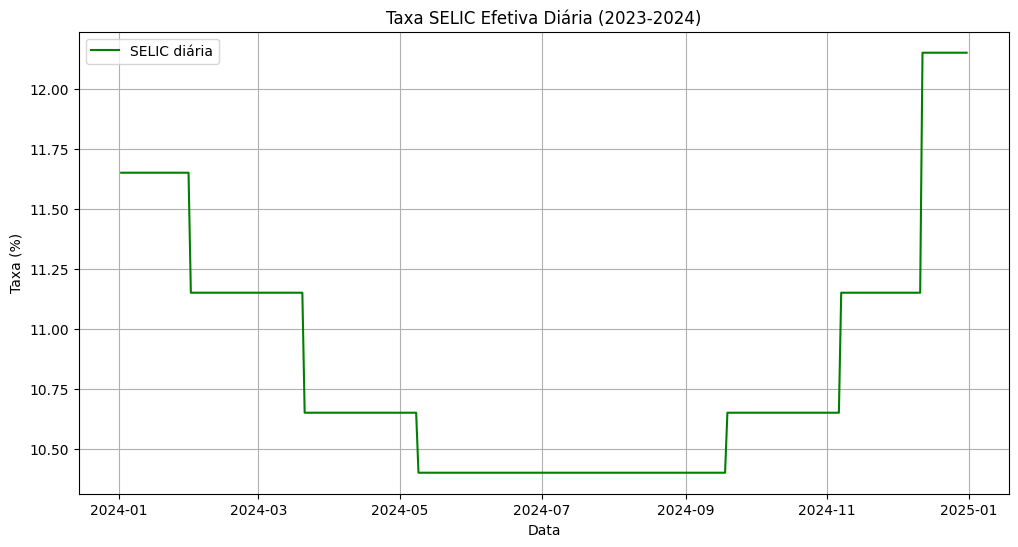

Média aritmética simples da SELIC (2023-2024): 10.83%
Média das médias anuais da SELIC (peso igual por ano): 10.83%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Série SELIC efetiva - Código 1178
selic_url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.1178/dados?formato=csv&dataInicial=31/12/2023&dataFinal=31/12/2024"

# Baixar os dados, especificando o separador e o decimal
selic_df = pd.read_csv(selic_url, sep=';', decimal=',', parse_dates=['data'], dayfirst=True)

# Renomear colunas
selic_df.columns = ['Data', 'SELIC']

# Converter a coluna SELIC para tipo numérico
selic_df['SELIC'] = pd.to_numeric(selic_df['SELIC'], errors='coerce')

# Filtrar intervalo desejado
start_date = "2023-12-31"
end_date = "2024-12-31"
selic_df = selic_df[(selic_df['Data'] >= start_date) & (selic_df['Data'] <= end_date)]

# Plotar a taxa SELIC
plt.figure(figsize=(12, 6))
plt.plot(selic_df['Data'], selic_df['SELIC'], label="SELIC diária", color='green')
plt.title("Taxa SELIC Efetiva Diária (2023-2024)")
plt.xlabel("Data")
plt.ylabel("Taxa (%)")
plt.grid()
plt.legend()
plt.show()

# ===== CÁLCULOS DE MÉDIAS =====

# Média aritmética simples (todos os dias)
selic_mean = selic_df['SELIC'].mean()
print(f"Média aritmética simples da SELIC (2023-2024): {selic_mean:.2f}%")

# Agrupar por ano e tirar a média anual
selic_df.set_index('Data', inplace=True)
selic_annual_avg = selic_df.resample('YE').mean()
selic_weighted_avg = selic_annual_avg['SELIC'].mean()

print(f"Média das médias anuais da SELIC (peso igual por ano): {selic_weighted_avg:.2f}%")

Desse modo, ao **maximizar o Índice de Sharpe dentro das restrições de alocação**, obtemos um portfólio otimizado que busca o melhor trade-off entre risco e retorno.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Lista de tickers
tickers = [
    "BBDC4.SA", "SBSP3.SA", "ELET3.SA", "B3SA3.SA", "SUZB3.SA",
    "EQTL3.SA", "RENT3.SA", "RDOR3.SA", "RADL3.SA", "BRFS3.SA",
    "RAIL3.SA", "VBBR3.SA", "ENEV3.SA", "CPLE6.SA", "CCRO3.SA",
    "EGIE3.SA", "CSNA3.SA", "HYPE3.SA", "CPFE3.SA", "BEEF3.SA"
]

start_date = "2023-12-31"
end_date = "2024-12-31"

# Baixar preços ajustados de fechamento
all_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']

# Remover colunas com dados faltantes
all_data = all_data.dropna(axis=1)
valid_tickers = all_data.columns.tolist()

# Calcular retornos logarítmicos diários
returns = np.log(all_data / all_data.shift(1)).dropna()

# Retorno médio anual e matriz de covariância anualizada
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Taxa livre de risco anual
risk_free_rate = selic_mean/100

# Função objetivo: negativo do índice de Sharpe (p/ minimização)
def negative_sharpe(weights):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return -sharpe_ratio

# Restrições: soma dos pesos = 1
constraints = {'type': 'eq',
               'fun': lambda x: np.sum(x) - 1}

# Limites: 0% ≤ peso ≤ 10%
bounds = tuple((0, 0.1) for _ in range(len(valid_tickers)))

# Pesos iniciais iguais
initial_weights = np.array([1 / len(valid_tickers)] * len(valid_tickers))

# Otimização
result = minimize(
    negative_sharpe,
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

if not result.success:
    print("Otimização falhou:", result.message)
else:
    optimal_weights = result.x
    optimal_sharpe = -result.fun
    portfolio_return = np.dot(optimal_weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

    weights_df = pd.DataFrame({
        'Ação': valid_tickers,
        'Alocação Ótima (%)': (optimal_weights * 100).round(2)
    }).sort_values(by='Alocação Ótima (%)', ascending=False)

    print("\n--- Alocação Ótima para Máximo Índice de Sharpe (0% ≤ peso ≤ 10%) ---")
    display(weights_df)

    print(f"\nRetorno Anual do Portfólio: {portfolio_return * 100:.2f}%")
    print(f"Volatilidade Anual do Portfólio: {portfolio_volatility * 100:.2f}%")
    print(f"Índice de Sharpe: {optimal_sharpe:.4f}")


[*********************100%***********************]  20 of 20 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCRO3.SA']: YFTzMissingError('possibly delisted; no timezone found')



--- Alocação Ótima para Máximo Índice de Sharpe (0% ≤ peso ≤ 10%) ---


,Ação,Alocação Ótima (%)
8,ELET3.SA,10.0
5,CPLE6.SA,10.0
3,BRFS3.SA,10.0
18,VBBR3.SA,10.0
16,SBSP3.SA,10.0
13,RAIL3.SA,10.0
7,EGIE3.SA,10.0
10,EQTL3.SA,10.0
17,SUZB3.SA,10.0
14,RDOR3.SA,10.0



Retorno Anual do Portfólio: -0.57%
Volatilidade Anual do Portfólio: 15.87%
Índice de Sharpe: -0.7188


### Referências Bibliográficas

**Markowitz, H.** (1952). *Portfolio selection*. The Journal of Finance, 7(1), 77-91.  
[DOI: 10.1111/j.1540-6261.1952.tb01525.x](https://doi.org/10.1111/j.1540-6261.1952.tb01525.x)  

**Markowitz, H. M.** (1990). *Foundations of Portfolio Theory: Nobel Lecture*. Economic Sciences, 279-287.  
[Disponível em NobelPrize.org](https://www.nobelprize.org/prizes/economic-sciences/1990/markowitz/lecture/)  

**Jagannathan, R., & Ma, T.** (2003). *Risk reduction in large portfolios: Why imposing the wrong constraints helps*. The Journal of Finance, 58(4), 1651-1683.  
[DOI: 10.1111/1540-6261.00580](https://doi.org/10.1111/1540-6261.00580)  


## Parte 2: Fluxo NTN-B (Com Juros Semestral)

Para a avaliação de um modelo de fluxo de pagamentos de um **título de renda fixa**, especificamente uma NTN-B (título público indexado à inflação com juros semestrais), abordaremos os conceitos fundamentais de precificação e análise de risco desse tipo de título. A NTN-B paga juros reais semestrais corrigidos pela inflação e devolve o principal corrigido pela inflação ao vencimento.

  O modelo calcula:
  - **Juros semestrais**: Pagamentos periódicos ajustados pela inflação
  - **Principal no vencimento**: Valor nominal corrigido pelo IPCA acumulado

  1. **Fluxo de Pagamentos**

  **a) Valor Nominal Atualizado (VNA):**
$$
VNA_t = VNA_{t-1} \times \frac{IPCA_{t-1}}{IPCA_{t-2}} \quad \text{(se dia 15 do mês)}
$$
ou
$$
VNA_t = VNA_{t-1} \times (1 + IPCA_{proj})^{\frac{du1}{du2}} \quad \text{(após dia 15)}
$$
- **Onde**:
  - $VNA$ =  Valor Nominal Atualizado
  - $du1$ = Número de dias úteis entre o dia 15 do mês anterior (inclusive) ao da liquidação e a data de liquidação (exclusive);
  - $du2$ = Número de dias úteis entre o dia 15 do mês anterior ao mês de liquidação (inclusive) e o dia 15 do mês de liquidação (exclusive).

**b) Cupom Semestral:** Como a taxa anual do cupom é 6%, a semestral será 2,9563%
$$
C_t = \left[(1 + \text{Taxa Real})^{1/2} - 1\right] \times VNA_t
$$

**c) Preço Unitário (PU):**
$$
PU = \left[ \sum_{k=1}^n \frac{C_k}{(1 + TIR)^{du_k/252}} + \frac{VNA_n}{(1 + TIR)^{du_n/252}} \right]
$$

2. **Duration de Macaulay**

Mede a sensibilidade do preço do título às variações nas taxas de juros (representa o prazo médio ponderado para recebimento dos fluxos, considerando o valor presente de cada fluxo):

$$
D = \frac{\sum_{t=1}^n \left( \frac{t}{252} \times \frac{CF_t}{(1 + y)^{t/252}} \right)}{PU}
$$
- **$CF_t$**: Fluxo de caixa no período t (cupom ou principal)
- **y**: Yield to Maturity (TIR)

In [ ]:
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from typing import Optional, Tuple

class NTNB:
    def __init__(self, taxa_real_anual: float, data_compra: str, data_venc: str,
                 ipca_proj: float, principal_nominal: float=2097.583332, liquidacao: Optional[str] = None):
        # Parâmetros do título
        self.taxa_real_anual = taxa_real_anual
        self.taxa_real_semestral = (1 + taxa_real_anual) ** 0.5 - 1  # Conversão da taxa anual para semestral
        self.data_compra = datetime.strptime(data_compra, "%d/%m/%Y")
        self.data_venc = datetime.strptime(data_venc, "%d/%m/%Y")
        self.data_liq = datetime.strptime(liquidacao, "%d/%m/%Y") if liquidacao else self.data_compra + timedelta(days=1)
        self.ipca_proj = ipca_proj
        self.principal = principal_nominal

        # Geração das datas dos cupons e tempos em anos
        self.datas_cupons = self._datas_cupons()
        self.tempos = [(d - self.data_liq).days / 365.0 for d in self.datas_cupons]

    def _datas_cupons(self):
        # Gera datas de cupons a cada 6 meses até a liquidação
        datas = []
        d = self.data_venc
        while d > self.data_liq:
            datas.append(d)
            d -= relativedelta(months=6)
        return sorted(datas)

    def _vna(self, t: float) -> float:
        # Valor Nominal Atualizado (VNA) pela inflação projetada
        return self.principal * (1 + self.ipca_proj) ** t

    def calcular_fluxos(self) -> Tuple[np.ndarray, np.ndarray]:
        # Calcula os fluxos de cupons e amortização final
        vna = np.array([self._vna(t) for t in self.tempos])
        cupons = vna * self.taxa_real_semestral
        cupons[-1] += vna[-1]  # Amortização final no último fluxo
        return cupons, np.array(self.tempos)

    def calcular_pu(self, tir: Optional[float] = None) -> float:
        # Calcula o preço unitário (PU) descontando os fluxos
        fluxos, tempos = self.calcular_fluxos()
        taxa = (1 + (tir or self.taxa_real_anual)) ** 0.5 - 1  # TIR em base semestral
        pv = fluxos / (1 + taxa) ** (2 * tempos)  # Valor presente dos fluxos
        self.pu = pv.sum()
        # Armazena para uso posterior
        self.fluxos, self.tempos, self.pv_fluxos = fluxos, tempos, pv
        return self.pu

    def calcular_duration(self, tir: Optional[float] = None) -> float:
        # Calcula a duração (duration) dos fluxos descontados
        if not hasattr(self, "pv_fluxos"):
            self.calcular_pu(tir)
        duration = np.sum(self.tempos * self.pv_fluxos) / self.pu
        self.duration = duration
        return duration

    def gerar_relatorio(self, tir: Optional[float] = None):
        # Gera relatório completo: PU, duration, tabela de fluxos
        self.calcular_pu(tir)
        self.calcular_duration(tir)

        print(f"\n{' Relatório NTN-B ':=^50}")
        print(f"Compra: {self.data_compra:%d/%m/%Y} | Liquidação: {self.data_liq:%d/%m/%Y} | Vencimento: {self.data_venc:%d/%m/%Y}")
        print(f"Taxa real anual: {self.taxa_real_anual:.2%} | IPCA proj: {self.ipca_proj:.2%}")
        print(f"TIR usada: {(tir if tir else self.taxa_real_anual):.2%}")
        print(f"\nPU: {self.pu:.6f} | Duration: {self.duration:.4f} anos\n")

        # Cabeçalho da tabela
        print(f"{'Data':<12}{'Dias':>6}{'Anos':>8}{'VNA':>15}{'Cupom':>15}{'Fluxo':>15}{'VP':>15}")

        # Detalhamento dos fluxos por data
        for d, t, f, vp in zip(self.datas_cupons, self.tempos, self.fluxos, self.pv_fluxos):
            dias = (d - self.data_liq).days
            vna = self._vna(t)
            cupom = vna * self.taxa_real_semestral
            if d == self.datas_cupons[-1]:
                cupom += vna  # Inclui amortização final
            print(f"{d:%d/%m/%Y}{dias:>6}{t:>8.4f}{vna:>15.6f}{cupom:>15.6f}{f:>15.6f}{vp:>15.6f}")

In [ ]:
# Exemplo de uso
titulo = NTNB(
    taxa_real_anual=0.06,
    data_compra="02/01/2012",
    data_venc="15/05/2017",
    ipca_proj=0.0053,
    liquidacao="03/01/2012"
)
titulo.gerar_relatorio(tir=0.0532)


================ Relatório NTN-B =================
Compra: 02/01/2012 | Liquidação: 03/01/2012 | Vencimento: 15/05/2017
Taxa real anual: 6.00% | IPCA proj: 0.53%
TIR usada: 5.32%

PU: 2232.409466 | Duration: 4.6656 anos

Data          Dias    Anos            VNA          Cupom          Fluxo             VP
15/05/2012   133  0.3644    2101.627450      62.130442      62.130442      60.967987
15/11/2012   317  0.8685    2107.235179      62.296223      62.296223      59.554036
15/05/2013   498  1.3644    2112.766076      62.459733      62.459733      58.195136
15/11/2013   682  1.8685    2118.403525      62.626393      62.626393      56.845492
15/05/2014   863  2.3644    2123.963736      62.790770      62.790770      55.548396
15/11/2014  1047  2.8685    2129.631064      62.958313      62.958313      54.260134
15/05/2015  1228  3.3644    2135.220744      63.123561      63.123561      53.022031
15/11/2015  1412  3.8685    2140.918109      63.291992      63.291992      51.792359
15/05/2016 

## Parte 3: Análise de Crédito

**Empresa: SUZANO PAPEL E CELULOSE S.A.**

**Proposta: Limite de R$ 500MM, prazo de 6 anos**

A presente análise tem como objetivo avaliar a viabilidade da concessão de um limite de crédito de R$ 500 milhões, com prazo de 6 anos, para a Suzano Papel e Celulose S.A., uma das maiores produtoras de celulose de fibra curta e papel da América Latina.

A análise apresenta a seguinte estruturação:
- Breve overview da empresa
- Principais de riscos e mitigantes
- Análise do Balanço, DRE e fluxo de caixa
- Parecer sobre a proposta
  
Fonte dos dados:
https://ri.suzano.com.br/Portuguese/informacoes-financeiras/central-de-resultados/default.aspx


#### **i. Breve Overview da Empresa**


A Suzano Papel e Celulose S.A. é uma das maiores empresas do setor de **papel e celulose do mundo**, com forte presença no mercado nacional e internacional. A companhia se destaca pela **integração vertical** de suas operações, abrangendo desde a gestão sustentável de florestas até a produção e comercialização de papel e celulose. Recentemente, a Suzano tem investido em inovação, sustentabilidade e expansão de capacidade produtiva, o que a posiciona como uma referência no setor. Além disso, a empresa possui uma governança robusta e um histórico consistente de adaptações frente às variáveis econômicas globais e regionais.

**Highlights**:

- A Suzano S.A., originária da fusão com a Fibria em 2019, é a maior produtora mundial de celulose de eucalipto e uma das maiores fabricantes de papel da América Latina.

- Opera verticalmente integrada: base florestal (2,6 milhões de hectares plantados e preservados), 11 unidades industriais em diversas regiões do Brasil, logística própria com portos e ferrovias.

- No final de 2024, inaugurou a nova fábrica de Ribas do Rio Pardo (MS), com capacidade anual de 2,55 milhões t de celulose e investimentos de ~R\$ 22,2 bi.

- Em 1Q25 reportou receita líquida recorde de R\$ 11,6 bi (+22% vs 1Q24), EBITDA ajustado de R\$ 4,9 bi (+7%) e geração de caixa operacional de R\$ 2,6 bi (+5%).

- Fundada em 1924, com forte governança (Novo Mercado), ações listadas na B3 (SUZB3) e na NYSE como ADRs.

/tmp/ipython-input-72-357966535.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download('SUZB3.SA', period='5y')
[*********************100%***********************]  1 of 1 completed


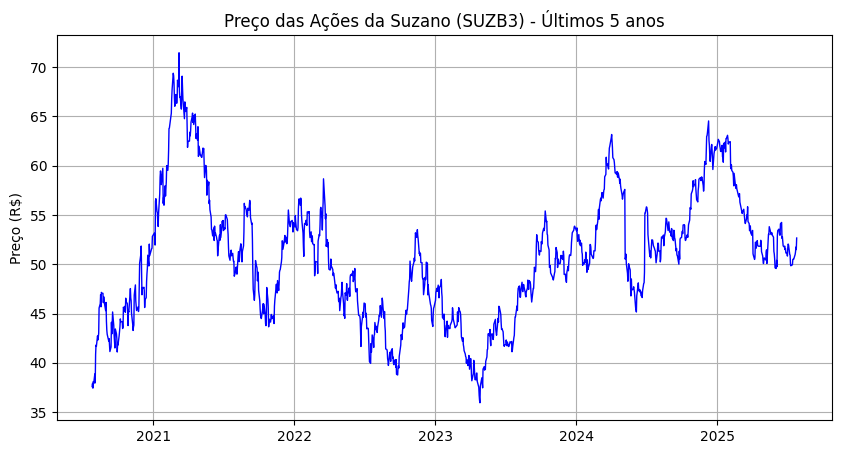

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
dados = yf.download('SUZB3.SA', period='5y')
plt.figure(figsize=(10,5))
plt.plot(dados.index, dados['Close'], color='blue', linewidth=1)
plt.title('Preço das Ações da Suzano (SUZB3) - Últimos 5 anos')
plt.ylabel('Preço (R$)')
plt.grid(True)
plt.show()

#### **ii. Principais de riscos e mitigantes**

1. **Risco de Mercado: Preço de Celulose e Papel**

    - **Descrição**: Os preços internacionais de celulose e papel são altamente voláteis, impactados por oferta e demanda global, sazonalidade, estoques dos compradores, eventos geopolíticos e concorrência na Ásia.

    - **Evidências**: O preço líquido médio (US$/t) da celulose e do papel oscilaram, respectivamente, -11% e 23% entre 2024 e 2025. Entretanto, no mercado externo, o volume de celulose representa 2.223.108 toneladas, enquanto o de papel apenas 103.474.

    - **Mitigantes**: Diversificação geográfica de clientes localizados em diversos continentes (Américas, Europa e Ásia). Estratégia comercial de recomposição de estoques para níveis normalizados.

2. **Risco Cambial: Dívida exposta ao dólar**

    - **Descrição**: Como 80% da dívida está em USD e 81% da receita é gerada no exterior, variações do BRL/USD afetam diretamente resultados financeiros e contábeis.

    - **Evidências**: Resultado financeiro líquido positivo em R$ 7,7 bi no 1T25, impulsionado pela valorização do BRL. Além disso, apresenta dívida líquida em USD 12,923 bi no 1T25.

    - **Mitigantes**: Política ativa de hedge cambial com ZCC e NDF (cobrindo aproximadamente 71% da exposição). Hedge natural proporcionado pelas receitas exportadoras em USD. Além disso, o resultado de operações com derivativos foi positivo em R$ 3.693 milhões no 1T25 sobretudo em função do impacto positivo da valorização cambial.

3. **Risco de Endividamento / Alavancagem Financeira**

    - **Descrição**:  Possui endividamento elevado em valores absolutos. A alta alavancagem pode pressionar o rating ou dificultar novas captações em cenários adversos.

    - **Evidências**: Dívida líquida de R$ 74,2 bi. Além disso, Dívida líquida/EBITDA Ajustado: 3,1x (BRL) e 3,0x (USD).

    - **Mitigantes**: Apresenta uma Liquidez robusta de R$ 24,2 bi. Perfil de dívida alongado: 76 meses de prazo médio. Custo da dívida em USD controlado: 5,0% a.a. Forte geração operacional de caixa (FCF yield de 18,5%).


4. **Risco Operacional: Concentração de paradas para manutenção**

    - **Descrição**: Paradas programadas ou não programadas podem reduzir a produção e impactar resultados de curto prazo.

    - **Evidências**: EBITDA Ajustado da celulose foi 26% inferior em relação ao 4T24, tendo como um de seus fatores o maior impacto das paradas programadas para manutenção. A Geração de caixa do segmento de celulose caiu -48% em 1T25 com relação ao 4T24.

    - **Mitigantes**: Calendário de paradas pré-definido e investimentos contínuos em manutenção preventiva. Projetos recentes, trazem ganhos de eficiência e redução de custo unitário no médio prazo, suportados por maior volume produzido a partir da nova operação de Ribas do Rio Pardo.

5. **Risco Ambiental e Regulatórios: ESG**
    - **Descrição**: Exposição à regulação ambiental (licenças, uso de água e florestas) e à percepção pública sobre sustentabilidade no setor.

    - **Evidências**: Aquecimento global e medidas governamentais de mitigação.

    - **Mitigantes**: 45% da dívida vinculada a instrumentos ESG. Governança ambiental em conformidade com os Sustainability Linked Loan Principle (SLLP), emitidos pela International Capital Market Association (ICMA). Projetos de substituição de plástico de uso único.

6. **Risco Macroeconômico Global**
    - **Descrição**: O cenário global de juros altos, inflação e desaceleração pode afetar demanda, preço e custo de capital.

    - **Evidências**: No início de 2025, na América do Norte e na Europa, já se observa um retorno às tendências estruturais de redução na demanda, exacerbada pelas incertezas macroeconômicas globais

    - **Mitigantes**: Suzano opera com base de clientes diversificada globalmente. Ajuste de volumes e estoques táticos em momentos de baixa demanda.

7. **Risco Geopolítico e Barreiras Comerciais: Risco Trump**

    - **Descrição**: A dependência das exportações de celulose para mercados estratégicos, como os Estados Unidos, expõe a Suzano a medidas protecionistas e geopolíticas que podem afetar significativamente suas margens e volumes exportados.

    - **Evidências**: Em 21 de julho de 2025, os Estados Unidos anunciaram um tarifário de 50% sobre a celulose brasileira, diretamente afetando as exportações da Suzano ([Fonte: G1](https://g1.globo.com/sp/mogi-das-cruzes-suzano/noticia/2025/07/21/tarifaco-imposto-de-50percent-dos-eua-ameaca-exportacoes-da-suzano.ghtml)).

    - **Mitigantes**: Estratégia ativa de diversificação de mercados (Ásia, Europa, América Latina). Capacidade logística e comercial para redirecionar volumes em resposta a choques externos. Presença produtiva nos EUA (Suzano Packaging US, porém, apenas papel cartão), que pode atenuar parte dos impactos no segmento de papel.

Em suma, apesar de operar em um setor cíclico e sensível ao câmbio e preços internacionais, em especial, aos riscos das alterações recentes nas decisões da Casa Branca. A Suzano mostra forte capacidade de mitigar riscos estruturais com estratégias sólidas de hedge, escala global, robustez de caixa, disciplina de alocação de capital e decisão de investimentos estratégicos.


#### **iii. Análise do Balanço, DRE e fluxo de caixa**

##### **1. Análise do Balanço Patrimonial**

  | Indicador                              | Valor 1T25 (R\$ bilhões) | Comentários                                       |
  | -------------------------------------- | ------------------- | ------------------------------------------------- |
  | **Dívida Bruta Total**                 | 91.043                | Redução de 10% vs. 4T24, com 96% no longo prazo   |
  | **Caixa, equivalentes e Aplicações Financeiras**               | 16.8                | 49% em USD, 51% em BRL                            |
  | **Dívida Líquida**                     | 74.209                | Leve redução trimestral; aumento de 24% vs. 1T24  |
  | **Dívida Líq./EBITDA Ajustado (R\$)**  | 3,1x                | Queda em relação aos 3,6x do 1T24                 |
  | **Dívida Líq./EBITDA Ajustado (US\$)** | 3,0x                | Leve alta frente ao 4T24 (2,9x)                   |
  | **Prazo Médio da Dívida**              | 76 meses            | Perfil alongado, com baixa pressão de curto prazo |

  Desse modo, é possível pontuar que estrutura de capital é robusta, com alta previsibilidade. A dívida está majoritariamente em moeda estrangeira (80% do total), porém, também é importante pontuar a natureza exportadora da Suzano e suas estratégias de hedge.

##### **2. Análise da Demonstração do Resultado (DRE)**

| Indicador                        | Valor 1T25 (R\$ milhões) | Variação Y-o-Y | Variação Q-o-Q                       |
| -------------------------------- | ------------------------ | -------------- | ------------------------------------ |
| **Receita Líquida**              | 11.553                   | +22%           | –19%                                 |
| **EBITDA Ajustado**              | 4.866                    | +7%            | –25%                                 |
| **Margem EBITDA Ajustada**       | 42%                      | –6 p.p.        | –4 p.p.                              |
| **Lucro Líquido**                | 6.348                    | fortemente +   | reversão de prejuízo (4T24: –6,7 bi) |
| **Resultado Financeiro Líquido** | +7.696                   | reversão       | alta expressiva                      |


Apesar da queda no volume vendido (–18% no consolidado), a receita e a margem foram sustentadas pela valorização cambial e maior contribuição da Suzano Packaging US.
O lucro líquido foi impulsionado por efeito contábil de variação cambial sobre a dívida em USD e operações de hedge. Excluindo esse efeito, o resultado recorrente é mais modesto.

##### **3. Análise do Fluxo de Caixa**

| Indicador                                            | Valor (R\$ milhões)     | Comentários                                 |
| ---------------------------------------------------- | ----------------------- | ------------------------------------------- |
| **Geração de Caixa Operacional (Consolidada)**       | 2.625                   | –46% vs. 4T24; +5% vs. 1T24                 |
| **Capex de Manutenção**                              | \~2.240                 | Concentrado no projeto Cerrado e manutenção |
| **Free Cash Flow Yield (UDM)**                       | 18,5%                   | Alta atratividade para o setor              |
| **Disponibilidade total (Caixa + crédito rotativo)** | R\$ 24,2 bi             | Forte liquidez imediata                     |
| **Projetos em andamento**                            | Cerrado (97% executado) | Restam R\$ 0,6 bi de capex                  |

A geração operacional de caixa caiu no trimestre por conta de paradas programadas e redução no volume de vendas, mas se mantém sólida no acumulado de 12 meses. A Suzano segue com alta capacidade de autofinanciamento, mesmo em um ciclo de investimentos e depreciação cambial.


##### **4.  Indicadores-Chave Consolidados**

| Indicador                    | Resultado | Comentários                             |
| ---------------------------- | --------- | ----------------------------------------- |
| EBITDA/t                     | R\$ 1.600 | Redução de 5% Y-o-Y, reflexo de CPV maior |
| CPV base caixa/t             | R\$ 1.811 | +23% Y-o-Y, impacto de paradas e dólar    |
| Geração de caixa/op. por t   | R\$ 830   | Resiliência mesmo com capex elevado       |
| Margem EBITDA papel/celulose | 21–49%    | Celulose com maior margem estrutural      |


A análise financeira da Suzano no 1T25 confirma uma empresa com estrutura de capital sólida, excelente liquidez e geração consistente de caixa. A volatilidade do trimestre foi pontual (paradas técnicas e câmbio), mas o desempenho anualizado é robusto. A alavancagem, embora acima da média de alguns setores, está dentro dos limites para empresas de base exportadora e com ativos industriais de grande escala. A companhia apresenta capacidade comprovada de honrar obrigações financeiras, mesmo sob choques cambiais e macroeconômicos adversos.

#### **iv. Parecer sobre a proposta**

Com base na análise realizada, conclui-se que a Suzano Papel e Celulose reúne as condições necessárias para suportar a proposta de crédito em avaliação. A empresa apresenta fundamentos operacionais e financeiros sólidos, destacando-se pela sua posição de liderança no setor de papel e celulose, elevada capacidade de geração de caixa, disciplina na gestão de capital e práticas consistentes de mitigação de riscos.

A estrutura de capital da companhia é robusta, com dívida majoritariamente de longo prazo, liquidez imediata superior a R$ 24 bilhões e indicadores de alavancagem controlados (Dívida Líquida/EBITDA em 3,1x). A geração de caixa operacional, mesmo diante de volatilidades sazonais e paradas programadas, mantém-se suficiente para cobrir obrigações financeiras e reinvestimentos, com Free Cash Flow Yield acumulado de 18,5% nos últimos 12 meses.

Riscos relevantes, como volatilidade cambial, queda de preços da celulose e tensões comerciais (ex: tarifa de 50% imposta pelos EUA em julho/2025), são monitorados de forma ativa e mitigados por meio de estratégias como hedge cambial, diversificação geográfica e flexibilidade operacional. A companhia ainda conta com elevada exposição a receitas em dólar, funcionando como hedge natural para sua dívida majoritariamente em moeda estrangeira.

A proposta de crédito no valor de R\$ 500 milhões, com prazo de 6 anos, representa menos de 1% da dívida bruta consolidada da Suzano (R\$ 91 bilhões) e cerca de 7% da sua liquidez imediata (R\$ 16,8 bilhões em caixa). Além disso, a empresa apresenta uma geração de EBITDA ajustado trimestral de R\$ 4,87 bilhões, o que equivale a quase 10 vezes o valor da proposta em apenas um trimestre.

Portanto, o volume de crédito solicitado é bastante conservador frente à escala financeira da companhia, tanto em termos de endividamento atual quanto de capacidade operacional e de geração de caixa. A Suzano tem plena condição de absorver a operação sem comprometer seu balanço ou indicadores de alavancagem.

### Referência

1. [Suzano – Central de Resultados (RI)](https://ri.suzano.com.br/Portuguese/informacoes-financeiras/central-de-resultados/default.aspx)